# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning II</font>

# Regressão Linear

Para entender completamente L1/L2, começaremos com a forma como eles são usados com regressão linear, que é a maneira mais simples de compreender.



Vamos tentar entender o impacto da complexidade do modelo na magnitude dos coeficientes. Como exemplo, vamos simular uma curva de seno (entre 60 ° e 300 °) e adicionar algum ruído aleatório usando o seguinte código:

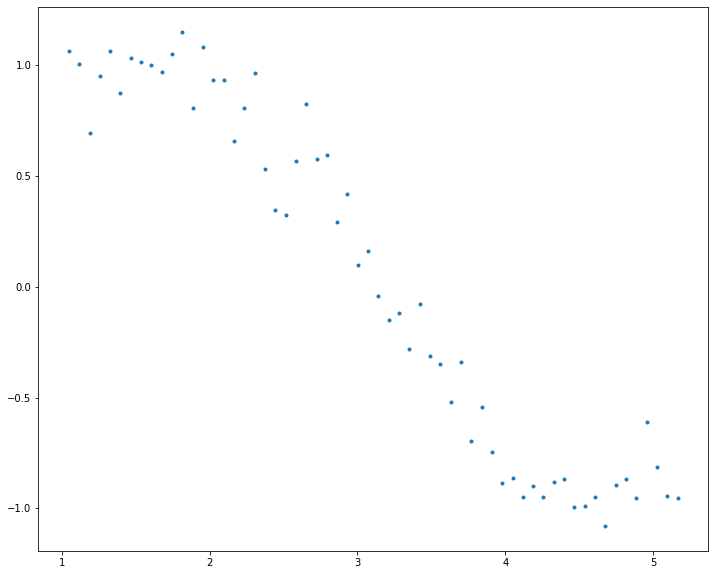

In [1]:
# Import
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10
from warnings import filterwarnings
filterwarnings('ignore')

# Definindo array de input com valores randômicos
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  
y = np.sin(x) + np.random.normal(0,0.15,len(x))
data = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
plt.plot(data['x'],data['y'],'.')

Isso se assemelha a uma curva de seno, mas não exatamente por causa do ruído. Usaremos isso como um exemplo para testar diferentes cenários. Vamos tentar estimar a função seno usando a regressão polinomial com potências de x na forma 1 a 15. Isso permite adicionar uma coluna para cada potência até 15 em nosso dataframe. Isso pode ser feito usando o seguinte código:

In [2]:
for i in range(2,16):  
    colname = 'x_%d'%i      
    data[colname] = data['x']**i
print (data.head())

          x         y       x_2       x_3       x_4       x_5       x_6  \
0  1.047198  1.065763  1.096623  1.148381  1.202581  1.259340  1.318778   
1  1.117011  1.006086  1.247713  1.393709  1.556788  1.738948  1.942424   
2  1.186824  0.695374  1.408551  1.671702  1.984016  2.354677  2.794587   
3  1.256637  0.949799  1.579137  1.984402  2.493673  3.133642  3.937850   
4  1.326450  1.063496  1.759470  2.333850  3.095735  4.106339  5.446854   

        x_7       x_8        x_9       x_10       x_11       x_12       x_13  \
0  1.381021  1.446202   1.514459   1.585938   1.660790   1.739176   1.821260   
1  2.169709  2.423588   2.707173   3.023942   3.377775   3.773011   4.214494   
2  3.316683  3.936319   4.671717   5.544505   6.580351   7.809718   9.268760   
3  4.948448  6.218404   7.814277   9.819710  12.339811  15.506664  19.486248   
4  7.224981  9.583578  12.712139  16.862020  22.366630  29.668222  39.353420   

        x_14       x_15  
0   1.907219   1.997235  
1   4.707635   5

Agora que temos todos as 15 potências, vamos construir 15 modelos de regressão linear diferentes com cada modelo contendo variáveis com potências de x. Por exemplo, o conjunto de características do modelo 8 será - {x, x_2, x_3, ..., x_8}.

Primeiro, definiremos uma função genérica que absorverá a potência máxima requerida de x como entrada e retornará uma lista contendo: [modelo RSS, interceptação, coef_x, coef_x2, ... até a potência introduzida]. Aqui, RSS refere-se a "Soma Residual dos Quadrados" ou Residual Sum of Square, que é a soma do quadrado de erros entre os valores previstos e reais no conjunto de dados de treinamento. O código Python que define a função é:

In [3]:
# Import
from sklearn.linear_model import LinearRegression

# Modelo
def linear_regression(data, power, models_to_plot):
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2,power+1)])
    
    # Fit do modelo
    linreg = LinearRegression(normalize=True)
    linreg.fit(data[predictors],data['y'])
    y_pred = linreg.predict(data[predictors])
    
    # Plot
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot Para a Potência: %d'%power)
    
    # RSS
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([linreg.intercept_])
    ret.extend(linreg.coef_)
    return ret

Observe que esta função não irá plotar o ajuste do modelo para todas as potências, mas irá retornar o RSS e os coeficientes para todos os modelos. 

Agora, podemos executar todos os 15 modelos e comparar os resultados. Para facilitar a análise, vamos armazenar todos os resultados em um dataframe do Pandas e plotar 6 modelos para ter uma ideia da tendência. Considere o seguinte código:

Esperamos que os modelos com crescente complexidade melhorem os dados e resultem em valores RSS mais baixos. Isso pode ser verificado observando os gráficos gerados para 6 modelos:

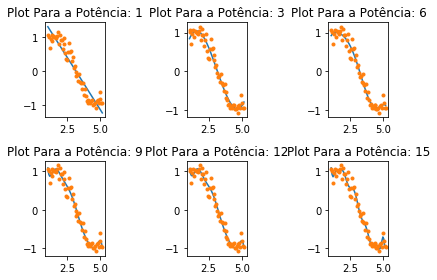

In [4]:
# Inicializa o dataframe para armazenar os resultados
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)

# Defina as potências para as quais é necessário um plot
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

# Iteração através de todas as potências e assimilação dos resultados
for i in range(1,16):
    coef_matrix_simple.iloc[i-1,0:i+2] = linear_regression(data, power = i, models_to_plot = models_to_plot)

À medida que a complexidade do modelo aumenta, os modelos tendem a ajustar desvios ainda menores no conjunto de dados de treinamento. Embora isso leve ao overfitting, deixamos essa questão de lado por algum tempo e chegamos ao nosso principal objetivo, ou seja, o impacto na magnitude dos coeficientes. Isso pode ser analisado observando o dataframe criado acima.

In [5]:
# Define o formato de exibição como científico para facilitar a análise
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_simple

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
model_pow_1   3.3         2    -0.62      NaN      NaN      NaN      NaN   
model_pow_2   3.3       1.9    -0.58   -0.006      NaN      NaN      NaN   
model_pow_3   1.1      -1.1        3     -1.3     0.14      NaN      NaN   
model_pow_4   1.1     -0.27      1.7    -0.53   -0.036    0.014      NaN   
model_pow_5     1         3     -5.1      4.7     -1.9     0.33   -0.021   
model_pow_6  0.99      -2.8      9.5     -9.7      5.2     -1.6     0.23   
model_pow_7  0.93        19      -56       69      -45       17     -3.5   
model_pow_8  0.92        43 -1.4e+02  1.8e+02 -1.3e+02       58      -15   
model_pow_9  0.87   1.7e+02 -6.1e+02  9.6e+02 -8.5e+02  4.6e+02 -1.6e+02   
model_pow_10 0.87   1.4e+02 -4.9e+02  7.3e+02   -6e+02  2.9e+02      -87   
model_pow_11 0.87       -75  5.1e+02 -1.3e+03  1.9e+03 -1.6e+03  9.1e+02   
model_pow_12 0.87  -3.4e+02  1.9e+03 -4.4e+03    6e+03 -5.2e+03  3.1e+03   
model_pow_13 0.86   3.2e+03 -1.8e+04  4.5e+04 -6.7e+04  6.6e+04 -4.6e+04   
model_pow_14 0.79   2.4e+04 -1.4e+05  3.8e+05 -6.1e+05  6.6e+05   -5e+05   
model_pow_15  0.7  -3.6e+04  2.4e+05 -7.5e+05  1.4e+06 -1.7e+06  1.5e+06   

             coef_x_6 coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11  \
model_pow_1       NaN      NaN      NaN      NaN       NaN       NaN   
model_pow_2       NaN      NaN      NaN      NaN       NaN       NaN   
model_pow_3       NaN      NaN      NaN      NaN       NaN       NaN   
model_pow_4       NaN      NaN      NaN      NaN       NaN       NaN   
model_pow_5       NaN      NaN      NaN      NaN       NaN       NaN   
model_pow_6    -0.014      NaN      NaN      NaN       NaN       NaN   
model_pow_7       0.4   -0.019      NaN      NaN       NaN       NaN   
model_pow_8       2.4    -0.21   0.0077      NaN       NaN       NaN   
model_pow_9        37     -5.2     0.42   -0.015       NaN       NaN   
model_pow_10       15    -0.81    -0.14    0.026   -0.0013       NaN   
model_pow_11 -3.5e+02       91      -16      1.8     -0.12    0.0034   
model_pow_12 -1.3e+03  3.8e+02      -80       12      -1.1     0.062   
model_pow_13  2.3e+04 -8.5e+03  2.3e+03 -4.5e+02        62      -5.7   
model_pow_14  2.8e+05 -1.2e+05  3.7e+04 -8.5e+03   1.5e+03  -1.8e+02   
model_pow_15   -1e+06    5e+05 -1.9e+05  5.4e+04  -1.2e+04   1.9e+03   

             coef_x_12 coef_x_13 coef_x_14 coef_x_15  
model_pow_1        NaN       NaN       NaN       NaN  
model_pow_2        NaN       NaN       NaN       NaN  
model_pow_3        NaN       NaN       NaN       NaN  
model_pow_4        NaN       NaN       NaN       NaN  
model_pow_5        NaN       NaN       NaN       NaN  
model_pow_6        NaN       NaN       NaN       NaN  
model_pow_7        NaN       NaN       NaN       NaN  
model_pow_8        NaN       NaN       NaN       NaN  
model_pow_9        NaN       NaN       NaN       NaN  
model_pow_10       NaN       NaN       NaN       NaN  
model_pow_11       NaN       NaN       NaN       NaN  
model_pow_12   -0.0016       NaN       NaN       NaN  
model_pow_13      0.31   -0.0078       NaN       NaN  
model_pow_14        15     -0.73     0.017       NaN  
model_pow_15  -2.2e+02        17     -0.81     0.018

O tamanho dos coeficientes aumenta exponencialmente com aumento na complexidade do modelo. Espero que isso dê alguma intuição sobre porque colocar uma restrição na magnitude dos coeficientes pode ser uma boa ideia para reduzir a complexidade do modelo.

Vamos tentar entender isso ainda melhor.

O que um coeficiente grande significa? Isso significa que estamos colocando muita ênfase nesse recurso, ou seja, a característica particular é um bom preditor para o resultado. Quando se torna muito grande, o algoritmo inicia a modelagem de relações intrínsecas para estimar a saída e acaba sendo tendo overfitting para os dados de treinamento específicos. Isso é o overfitting e a regularização pode ser a solução para resolver ou pelo menos atenuar o problema.

# Regularização L1 (Lasso) 

LASSO representa o Operador de Menor Absoluto de Contração e Seleção. Eu sei que a definição não é muito intuitiva, mas existem duas palavras-chave: "absoluto" e "seleção".

Vamos considerar o primeiro e se preocupar com o último mais tarde.

A regressão Lasso executa a regularização L1, ou seja, acrescenta um fator de soma do valor absoluto dos coeficientes no objetivo de otimização. Assim, a regressão LASSO otimiza o seguinte:

Objetivo = RSS + α * (soma do valor absoluto dos coeficientes)

Aqui, α (alfa) fornece um trade-off entre o balanceamento do RSS e a magnitude dos coeficientes. 

* Α = 0: os mesmos coeficientes que a regressão linear simples
* Α = ∞: todos os coeficientes zero (mesma lógica do que antes)
* 0 <α <∞: coeficientes entre 0 e o de regressão linear simples

Vamos executar a regressão LASSO no mesmo problema descrito acima. Primeiro, definiremos uma função genérica:

In [6]:
from sklearn.linear_model import Lasso

def lasso_regression(data, predictors, alpha, models_to_plot={}):
    lassoreg = Lasso(alpha = alpha, normalize = True, max_iter = 1e5)
    lassoreg.fit(data[predictors],data['y'])
    y_pred = lassoreg.predict(data[predictors])
    
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([lassoreg.intercept_])
    ret.extend(lassoreg.coef_)
    return ret

Observe os parâmetros adicionais definidos na função Lasso - 'max_iter'. Este é o número máximo de iterações para as quais queremos que o modelo seja executado caso não ocorra a convergência antes. 

Vamos verificar a saída para 10 valores diferentes de alfa usando o seguinte código:

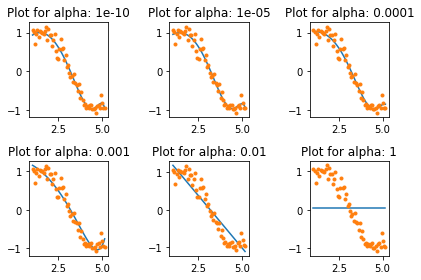

In [7]:
# InicializA os preditores de todas as 15 potências de x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

# Define os valores alfa para testar
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

# Inicializa o dataframe para armazenar coeficientes
col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

# Define os modelos para o Plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

# Iteração sobre os 10 valores alfa:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

Isso novamente nos diz que a complexidade do modelo diminui com o aumento dos valores de alfa. Mas observe a linha reta em alfa = 1. Parece um pouco estranho não?. Vamos explorar isso ainda mais, analisando os coeficientes.

Além da inferência esperada de RSS para alphas mais elevados, podemos ver o seguinte:

* Para os mesmos valores de alfa, os coeficientes de regressão LASSO são muito menores em comparação com o da regressão Ridge (compare a linha 1 das 2 tabelas).

* Para o mesmo alfa, o LASSO tem maior RSS (ajuste mais desfavorável) em comparação com a regressão Ridge.

* Muitos dos coeficientes são zero mesmo para valores muito pequenos de alfa.

* As inferências # 1,2 podem não generalizar sempre, mas serão válidas para muitos casos. Vamos verificar o número de coeficientes que são zero em cada modelo usando o seguinte código:

In [8]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0),axis=1)

alpha_1e-15      0
alpha_1e-10      0
alpha_1e-08      0
alpha_1e-05      8
alpha_0.0001    10
alpha_0.001     12
alpha_0.01      13
alpha_1         15
alpha_5         15
alpha_10        15
dtype: int64

Podemos observar que mesmo para um pequeno valor de alfa, um número significativo de coeficientes é zero. Isso também explica o ajuste de linha horizontal para alfa = 1 nas parcelas de LASSO. Esse fenômeno da maioria dos coeficientes sendo zero é chamado de "sparsity". Embora o LASSO realize a seleção de características, esse nível de sparsity é alcançado somente em casos especiais.

Isso tem algumas implicações realmente interessantes nos casos de uso da regressão LASSO em comparação com a regressão Ridge. 

# Regularização L2 (Ridge) 

Como mencionado anteriormente, a regressão Ridge executa a "regularização L2", ou seja, adiciona um fator de soma de quadrados de coeficientes no objetivo de otimização. Assim, a regressão Ridge optimiza o seguinte:

Objetivo = RSS + α * (soma do quadrado dos coeficientes)

Aqui, α (alfa) é o parâmetro que equilibra a quantidade de ênfase dada à minimização de RSS, minimizando a soma do quadrado de coeficientes. Α pode ter vários valores:

* Α = 0: O objetivo se torna igual à regressão linear simples. Obteremos os mesmos coeficientes que a regressão linear simples.
* Α = ∞: Os coeficientes serão zero. Por quê? Por causa do peso infinito no quadrado de coeficientes, qualquer coisa menor que zero tornará o objetivo infinito.
* 0 <α <∞: A magnitude de α determinará o peso atribuído a diferentes partes do objetivo. Os coeficientes estarão entre 0 e outros para regressão linear simples.

Espero que isso dê algum sentido sobre o impacto da magnitude dos coeficientes. Uma coisa é certa: qualquer valor não-zero daria valores inferiores aos da regressão linear simples. Por quanto? Vamos ver a regressão Ridge em ação no mesmo problema que o anterior.

Primeiro, vamos definir uma função genérica para regressão Ridge semelhante à definida para regressão linear simples. O código Python é:

In [9]:
from sklearn.linear_model import Ridge

def ridge_regression(data, predictors, alpha, models_to_plot={}):
    
    # Fit do modelo usando Regressão Rdige
    ridgereg = Ridge(alpha = alpha, normalize = True)
    ridgereg.fit(data[predictors],data['y'])
    y_pred = ridgereg.predict(data[predictors])
    
    # Verificamos se um gráfico deve ser feito para o alfa inserido
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)
    
    # Retorna o resultado em formato pré-definido
    rss = sum((y_pred-data['y'])**2)
    ret = [rss]
    ret.extend([ridgereg.intercept_])
    ret.extend(ridgereg.coef_)
    return ret

Observe a função 'Ridge' usada aqui. É preciso 'alfa' como parâmetro na inicialização. Além disso, tenha em mente que a normalização dos inputs geralmente é uma boa ideia em todos os tipos de regressão e também deve ser usada no caso de regressão Ridge.

Agora, analisemos o resultado da regressão de Ridge para 10 valores diferentes de α variando de 1e-15 a 20. Esses valores foram escolhidos para que possamos analisar facilmente a tendência com alteração nos valores de α. Estes, no entanto, diferem de caso para caso.

Observe que cada um desses 10 modelos conterá todas as 15 variáveis e somente o valor de alfa seria diferente. Isso é diferente do caso de regressão linear simples em que cada modelo tinha um subconjunto de recursos.

Código Python:

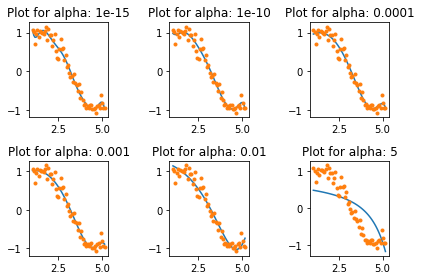

In [10]:
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

Aqui podemos observar claramente que, à medida que o valor de alfa aumenta, a complexidade do modelo reduz. Embora os valores mais elevados de alfa reduzam o overfitting, valores significativamente altos também podem causar adequação (por exemplo, alfa = 5). Assim, alfa deve ser escolhido com sabedoria. Uma técnica amplamente aceita é a validação cruzada, ou seja, o valor de alfa é iterado em uma variedade de valores e é escolhido aquele que fornece maior pontuação de validação cruzada.

Dê uma olhada no valor dos coeficientes nos modelos acima:

Código Python:

In [11]:
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

rss intercept coef_x_1 coef_x_2 coef_x_3 coef_x_4 coef_x_5  \
alpha_1e-15  0.87        94   -3e+02  3.8e+02 -2.4e+02       68     -1.3   
alpha_1e-10  0.92        11      -29       31      -15      2.9     0.17   
alpha_1e-08  0.95       1.3     -1.5      1.7    -0.68    0.039    0.016   
alpha_0.0001 0.96      0.56     0.55    -0.13   -0.026  -0.0028 -0.00011   
alpha_0.001     1      0.82     0.31   -0.087    -0.02  -0.0028 -0.00022   
alpha_0.01    1.4       1.3   -0.088   -0.052    -0.01  -0.0014 -0.00013   
alpha_1       5.6      0.97    -0.14   -0.019   -0.003 -0.00047   -7e-05   
alpha_5        14      0.55   -0.059  -0.0085  -0.0014 -0.00024 -4.1e-05   
alpha_10       18       0.4   -0.037  -0.0055 -0.00095 -0.00017   -3e-05   
alpha_20       23      0.28   -0.022  -0.0034  -0.0006 -0.00011   -2e-05   

             coef_x_6 coef_x_7 coef_x_8 coef_x_9 coef_x_10 coef_x_11  \
alpha_1e-15      -3.7      0.3     0.19   -0.021   -0.0076    0.0011   
alpha_1e-10    -0.091   -0.011    0.002  0.00064   2.4e-05    -2e-05   
alpha_1e-08   0.00016 -0.00036 -5.4e-05 -2.9e-07   1.1e-06   1.9e-07   
alpha_0.0001  4.1e-05  1.5e-05  3.7e-06  7.4e-07   1.3e-07   1.9e-08   
alpha_0.001   1.8e-05  1.2e-05  3.4e-06  7.3e-07   1.3e-07   1.9e-08   
alpha_0.01    7.2e-07  4.1e-06  1.3e-06    3e-07   5.6e-08     9e-09   
alpha_1      -9.9e-06 -1.3e-06 -1.4e-07 -9.3e-09   1.3e-09   7.8e-10   
alpha_5      -6.9e-06 -1.1e-06 -1.9e-07 -3.1e-08  -5.1e-09  -8.2e-10   
alpha_10     -5.2e-06 -9.2e-07 -1.6e-07 -2.9e-08  -5.1e-09  -9.1e-10   
alpha_20     -3.6e-06 -6.6e-07 -1.2e-07 -2.2e-08    -4e-09  -7.5e-10   

             coef_x_12 coef_x_13 coef_x_14 coef_x_15  
alpha_1e-15    0.00024  -6.3e-05   4.5e-06  -8.7e-08  
alpha_1e-10   -4.2e-06   2.2e-07   2.3e-07  -2.3e-08  
alpha_1e-08      2e-08   3.9e-09   8.2e-10  -4.6e-10  
alpha_0.0001   1.9e-09  -1.3e-10  -1.5e-10  -6.2e-11  
alpha_0.001    1.7e-09  -1.5e-10  -1.4e-10  -5.2e-11  
alpha_0.01     1.1e-09   4.3e-11  -3.1e-11  -1.5e-11  
alpha_1        2.4e-10   6.2e-11   1.4e-11   3.2e-12  
alpha_5       -1.3e-10    -2e-11    -3e-12  -4.2e-13  
alpha_10      -1.6e-10  -2.9e-11  -5.1e-12  -9.1e-13  
alpha_20      -1.4e-10  -2.5e-11  -4.7e-12  -8.7e-13

Isso imediatamente nos dá as seguintes inferências:

O RSS aumenta com o aumento do alfa, e esta complexidade do modelo reduz um alfa tão pequeno como 1e-15 e nos dá uma redução significativa na magnitude dos coeficientes. Como? Compare os coeficientes na primeira linha desta tabela com a última linha de tabela de regressão linear simples. Altos valores alfa podem levar a inadequações significativas. 

Observe o aumento rápido no RSS para valores de alfa maiores que 1 embora os coeficientes sejam muito pequenos, eles NÃO são zero. Os primeiros 3 são muito intuitivos. Mas # 4 também é uma observação crucial. 

## Conclusão

Agora que temos uma ideia de como funciona a regressão LASSO e Ridge, vamos tentar consolidar nossa compreensão comparando-os e tentando apreciar seus casos específicos de uso. 

1. Diferença-chave

Ridge: inclui todos (ou nenhum) dos recursos no modelo. Assim, a principal vantagem da regressão Ridge é o encolhimento do coeficiente e a redução da complexidade do modelo.

LASSO: Além do encolhimento dos coeficientes, o LASSO também faz a seleção de características. Como observamos anteriormente, alguns dos coeficientes tornam-se exatamente zero, o que é equivalente à característica particular que está sendo excluída do modelo.

Tradicionalmente, técnicas como regressão stepwise foram usadas para executar a seleção de características e fazer modelos parcimoniosos. Mas com os avanços na Aprendizagem de Máquina, regressão LASSO e Ridge fornecem alternativas muito boas à medida que dão uma saída muito melhor, exigem menos parâmetros de ajuste e podem ser automatizados em grande extensão.

2. Casos de uso típicos

Ridge: é usado principalmente para evitar o overfitting. Uma vez que inclui todos os recursos, não é muito útil no caso de #features exorbitantes, digamos em milhões, pois representará desafios computacionais.

LASSO: uma vez que fornece soluções esparsas, geralmente é o modelo de escolha (ou alguma variante deste conceito) para modelar casos em que as #features são em milhões ou mais. Nesse caso, obter uma solução esparsa é de grande vantagem computacional, pois os recursos com coeficientes zero podem simplesmente ser ignorados.

Junto com Ridge e Lasso, Elastic Net é outra técnica útil que combina a regularização L1 e L2. Ele pode ser usado para equilibrar os prós e os contras da regressão LASSO e Ridge. Encorajo você a pesquisar mais sobre isso!

# Fim